In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import KFold
from datetime import datetime
from pprint import pprint
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
data.shape

(35064, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34285.0,65.989497,72.267723,3.0000,14.00,41.0,93.00,881.0
PM10,34408.0,83.739723,79.541685,2.0000,26.00,60.0,117.00,905.0
SO2,34334.0,11.749650,15.519259,0.2856,2.00,5.0,15.00,156.0
NO2,33830.0,27.585467,26.383882,1.0265,9.00,19.0,38.00,205.0
CO,33052.0,904.896073,903.306220,100.0000,300.00,600.0,1200.00,10000.0


In [ ]:
list(data.columns)

['No',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station']

In [ ]:
num_c = data.select_dtypes(include=np.number).columns.tolist()
cat_c = data.select_dtypes(include="object").columns.tolist() 
print("List of numerical colums:",num_c)
print("List of categorical colums:",cat_c)

List of numerical colums: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
List of categorical colums: ['wd', 'station']


In [ ]:
#Checking % of the null values for each features
data_percentage=(data.isnull().sum()/35064)*100
data_percentage

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.221652
PM10       1.870865
SO2        2.081907
NO2        3.519279
CO         5.738079
O3         3.462240
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64

In [ ]:
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

In [ ]:
data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01


In [ ]:
filtered_features_data=pd.DataFrame(data,columns={"year","month","day","hour","PM2.5","PM10","NO2","CO","SO2","O3","TEMP","PRES","RAIN"})
filtered_features_data.head()

,RAIN,PM2.5,PRES,O3,CO,TEMP,hour,year,SO2,day,NO2,month,PM10
0,0.0,4.0,1020.8,82.0,200.0,-2.3,0,2013,3.0,1,NaN,3,4.0
1,0.0,7.0,1021.3,80.0,200.0,-2.5,1,2013,3.0,1,NaN,3,7.0
2,0.0,5.0,1021.3,79.0,200.0,-3.0,2,2013,3.0,1,2.0,3,5.0
3,0.0,6.0,1021.8,79.0,200.0,-3.6,3,2013,3.0,1,NaN,3,6.0
4,0.0,5.0,1022.3,81.0,200.0,-3.5,4,2013,3.0,1,NaN,3,5.0


<Figure size 1080x720 with 0 Axes>

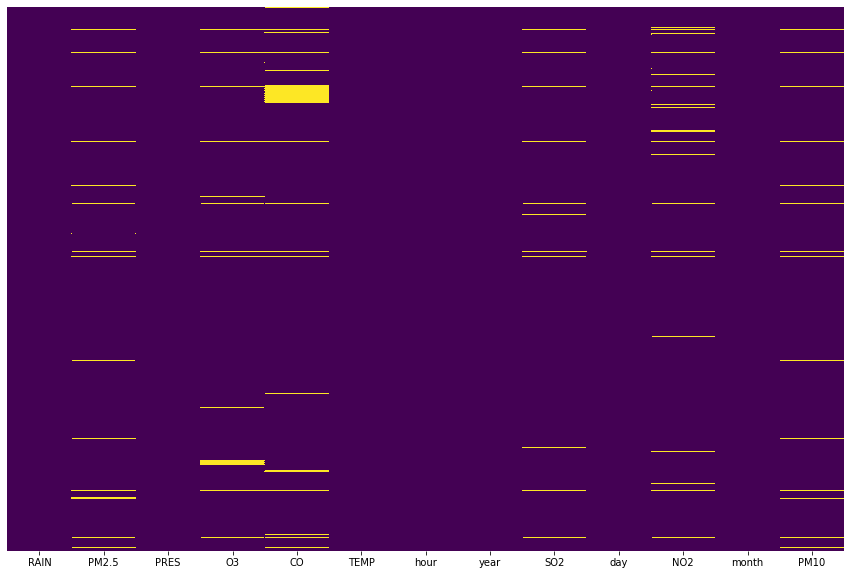

In [ ]:
plt.figure(2, figsize = [15,10])
sns.heatmap(filtered_features_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
filtered_features_data['PM2.5']=filtered_features_data['PM2.5'].fillna(method='bfill')
filtered_features_data['PM10']=filtered_features_data['PM10'].fillna(method='ffill')
filtered_features_data['SO2']=filtered_features_data['SO2'].fillna(method='ffill')
filtered_features_data['NO2']=filtered_features_data['NO2'].fillna(method='bfill')
filtered_features_data['O3']=filtered_features_data['O3'].fillna(method='ffill')
filtered_features_data['CO']=filtered_features_data['CO'].fillna(method='ffill')
filtered_features_data['RAIN']=filtered_features_data['RAIN'].fillna(method='ffill')
filtered_features_data['TEMP']=filtered_features_data['TEMP'].fillna(method='ffill')
filtered_features_data['PRES']=filtered_features_data['PRES'].fillna(method='ffill')

filtered_features_data.head(5)

,RAIN,PM2.5,PRES,O3,CO,TEMP,hour,year,SO2,day,NO2,month,PM10
0,0.0,4.0,1020.8,82.0,200.0,-2.3,0,2013,3.0,1,2.0,3,4.0
1,0.0,7.0,1021.3,80.0,200.0,-2.5,1,2013,3.0,1,2.0,3,7.0
2,0.0,5.0,1021.3,79.0,200.0,-3.0,2,2013,3.0,1,2.0,3,5.0
3,0.0,6.0,1021.8,79.0,200.0,-3.6,3,2013,3.0,1,4.0,3,6.0
4,0.0,5.0,1022.3,81.0,200.0,-3.5,4,2013,3.0,1,4.0,3,5.0


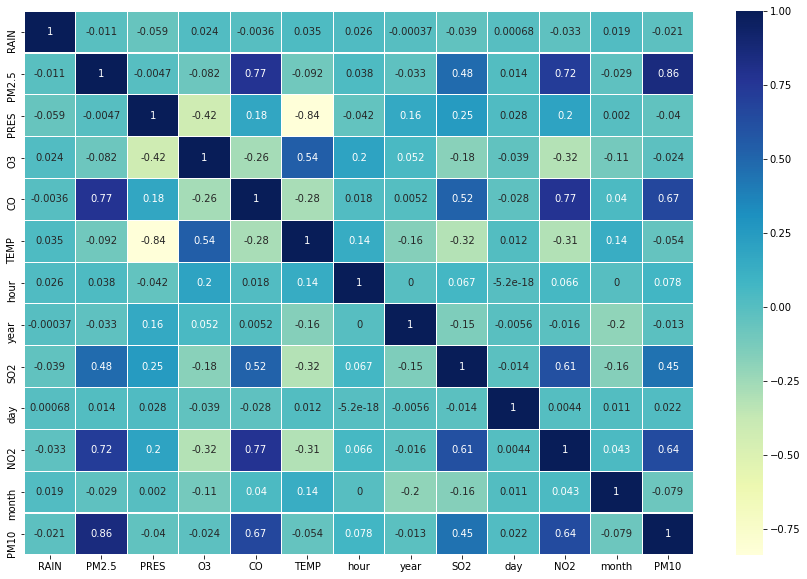

In [ ]:
corr_matrix = filtered_features_data.corr()
f, ax = plt.subplots(figsize =(15, 10)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot= True)

In [ ]:
df_reg=pd.DataFrame(filtered_features_data,columns={'SO2','NO2','O3','PRES','TEMP','CO','PM2.5','RAIN'})
df_reg.head()

,RAIN,PM2.5,PRES,O3,CO,TEMP,SO2,NO2
0,0.0,4.0,1020.8,82.0,200.0,-2.3,3.0,2.0
1,0.0,7.0,1021.3,80.0,200.0,-2.5,3.0,2.0
2,0.0,5.0,1021.3,79.0,200.0,-3.0,3.0,2.0
3,0.0,6.0,1021.8,79.0,200.0,-3.6,3.0,4.0
4,0.0,5.0,1022.3,81.0,200.0,-3.5,3.0,4.0


In [ ]:
data_percentage=(filtered_features_data.isnull().sum()/35064)*100
data_percentage

RAIN     0.0
PM2.5    0.0
PRES     0.0
O3       0.0
CO       0.0
TEMP     0.0
hour     0.0
year     0.0
SO2      0.0
day      0.0
NO2      0.0
month    0.0
PM10     0.0
dtype: float64

In [ ]:
X=pd.DataFrame(df_reg,columns={'SO2','NO2','O3','PRES','TEMP','CO','RAIN',})
Y=pd.DataFrame(df_reg,columns={'PM2.5'})      

In [ ]:
#handling overfitting and improve accuracy
model=ExtraTreesRegressor()
model.fit(X,Y.values.ravel())

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.00542795 0.07469856 0.06752346 0.37780976 0.060375   0.07332457
 0.34084071]


<Figure size 1080x720 with 0 Axes>

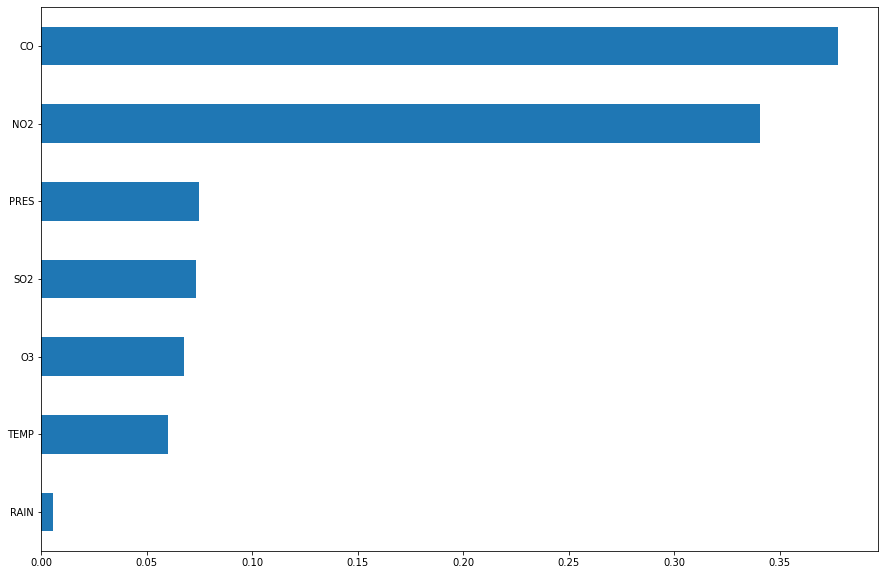

In [ ]:
plt.figure(2, figsize = [15,10])
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
Y_test1=Y_test.copy()
Y_test1=Y_test1.reset_index()
Y_test2=pd.DataFrame(Y_test1,columns={"PM2.5"})
Y_test2.head()

,PM2.5
0,52.0
1,91.0
2,37.0
3,17.0
4,31.0


#**Linear Regression**

In [ ]:
lregressor=LinearRegression()
lregressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lregressor.coef_

array([[-0.3852512 , -0.75681046,  0.12672134,  0.04381426,  0.18666783,
         0.19745476,  0.95224771]])

In [ ]:
lregressor.intercept_

array([748.54802901])

In [ ]:
prediction=lregressor.predict(X_test)

In [ ]:
data_prediction=pd.DataFrame(prediction,columns={"Predicted_PM 2.5"})
data_prediction.head()

,Predicted_PM 2.5
0,36.613079
1,96.237889
2,49.661073
3,24.319407
4,52.596610


In [ ]:
df_row_merged = pd.concat([Y_test2,data_prediction],axis=1)
df_row_merged.head(5)

,PM2.5,Predicted_PM 2.5
0,52.0,36.613079
1,91.0,96.237889
2,37.0,49.661073
3,17.0,24.319407
4,31.0,52.596610


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lregressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.6835893422080143


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(lregressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.6600870409237314


In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 27.134731035880616
MSE: 1785.4038941921397
RMSE: 42.25403997480169


# **K-Nearest Neigbour**

In [ ]:
kregressor=KNeighborsRegressor(n_neighbors=6)
kregressor.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
knn_prediction=kregressor.predict(X_test)

In [ ]:
knn_prediction=pd.DataFrame(knn_prediction,columns={"Predicted_PM 2.5"})
knn_prediction.head()

,Predicted_PM 2.5
0,40.666667
1,95.833333
2,47.666667
3,12.333333
4,38.000000


In [ ]:
df_row_merged_knn = pd.concat([Y_test2,knn_prediction],axis=1)
df_row_merged_knn.head(5)

,PM2.5,Predicted_PM 2.5
0,52.0,40.666667
1,91.0,95.833333
2,37.0,47.666667
3,17.0,12.333333
4,31.0,38.000000


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(kregressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.8384375889163983


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(kregressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.7391085467948861


In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, knn_prediction))
print('MSE:', metrics.mean_squared_error(Y_test, knn_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, knn_prediction)))

MAE: 21.57333174904943
MSE: 1370.3408595532321
RMSE: 37.01811528904777


# **Decision Tree**

In [ ]:
dtree=DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtreePrediction=dtree.predict(X_test)
dtreePrediction

array([28., 79., 51., ...,  8., 55., 60.])

In [ ]:
dtreePrediction_data=pd.DataFrame(dtreePrediction,columns={"Predicted_PM 2.5"})
dtreePrediction_data.head()

,Predicted_PM 2.5
0,28.0
1,79.0
2,51.0
3,27.0
4,52.0


In [ ]:
df_row_merged_dtree = pd.concat([dtreePrediction_data,Y_test2],axis=1)
df_row_merged_dtree.head()

,Predicted_PM 2.5,PM2.5
0,28.0,52.0
1,79.0,91.0
2,51.0,37.0
3,27.0,17.0
4,52.0,31.0


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999998238727992


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.6732848906262623


In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, dtreePrediction))
print('MSE:', metrics.mean_squared_error(Y_test, dtreePrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, dtreePrediction)))

MAE: 22.33851711026616
MSE: 1716.0817585551333
RMSE: 41.425617177721485


# **L1 and L2 Regularization**

In [ ]:
l1_model = Lasso(alpha=1.0)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

In [ ]:
l1_model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predictl1 = l1_model.predict(X_test)

In [ ]:
predictl1_data=pd.DataFrame(predictl1,columns={"Predicted_PM 2.5"})
predictl1_data.head()

,Predicted_PM 2.5
0,36.451536
1,96.423147
2,49.928476
3,24.092337
4,52.644779


In [ ]:
df_row_merged_L1 = pd.concat([predictl1_data,Y_test2],axis=1)
df_row_merged_L1.head()

,Predicted_PM 2.5,PM2.5
0,36.451536,52.0
1,96.423147,91.0
2,49.928476,37.0
3,24.092337,17.0
4,52.644779,31.0


In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictl1))
print('MSE:', metrics.mean_squared_error(Y_test, predictl1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictl1)))

MAE: 27.11141001480958
MSE: 1785.6842841498255
RMSE: 42.25735775163688


In [ ]:
modell2 = Ridge(alpha=1.0)

In [ ]:
modell2.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
predictr = modell2.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictr))
print('MSE:', metrics.mean_squared_error(Y_test, predictr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictr)))

MAE: 27.134730640897306
MSE: 1785.4039141202807
RMSE: 42.25404021061514


# **Random Forest**

In [ ]:
randomforest=RandomForestRegressor()
randomforest.fit(X_train,Y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
randomforest_prediction=randomforest.predict(X_test)
randomforest_prediction_data=pd.DataFrame(randomforest_prediction,columns={"Predicted_PM 2.5"})
randomforest_prediction_data.head()

,Predicted_PM 2.5
0,36.97
1,83.55
2,48.58
3,17.82
4,41.19


In [ ]:
df_row_merged_randomforest = pd.concat([Y_test2,randomforest_prediction_data],axis=1)
df_row_merged_randomforest.tail()

,PM2.5,Predicted_PM 2.5
10515,132.0,133.02
10516,7.0,13.34
10517,12.0,15.69
10518,87.0,105.01
10519,27.0,71.19


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(randomforest.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.9799058123859626


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(randomforest.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on train set: 0.8370627737414597


In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, randomforest_prediction))
print('MSE:', metrics.mean_squared_error(Y_test, randomforest_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, randomforest_prediction)))

MAE: 16.999354906753574
MSE: 855.8330905106526
RMSE: 29.254625113144975


In [ ]:
print('Parameters currently in use:\n')
pprint(randomforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# **Hyper Parameter Optimization of Random Forest**



In [ ]:
df_s=pd.DataFrame(filtered_features_data,columns={'year','month','day','hour','SO2','NO2','O3','PRES','TEMP','CO','PM2.5','PM10','RAIN'})
df_s.head()

,RAIN,PM2.5,PRES,O3,CO,TEMP,hour,year,SO2,day,NO2,month,PM10
0,0.0,4.0,1020.8,82.0,200.0,-2.3,0,2013,3.0,1,2.0,3,4.0
1,0.0,7.0,1021.3,80.0,200.0,-2.5,1,2013,3.0,1,2.0,3,7.0
2,0.0,5.0,1021.3,79.0,200.0,-3.0,2,2013,3.0,1,2.0,3,5.0
3,0.0,6.0,1021.8,79.0,200.0,-3.6,3,2013,3.0,1,4.0,3,6.0
4,0.0,5.0,1022.3,81.0,200.0,-3.5,4,2013,3.0,1,4.0,3,5.0


In [ ]:
x=pd.DataFrame(filtered_features_data,columns={'year','month','day','hour','SO2','NO2','O3','PRES','TEMP','CO','RAIN'})
y=pd.DataFrame(filtered_features_data,columns={'PM2.5'})      

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.head()
y_train.head()

,RAIN,PRES,O3,CO,TEMP,hour,year,SO2,day,NO2,month
22659,0.0,1001.9,55.0,300.0,14.7,3,2015,7.0,1,7.0,10
32150,0.0,1016.2,65.0,300.0,9.5,14,2016,4.0,30,9.0,10
16704,0.0,1014.0,2.0,2200.0,-2.0,0,2015,5.0,26,61.0,1
33702,0.0,1013.2,14.0,3300.0,-4.4,6,2017,12.0,3,57.0,1
17741,0.0,1025.9,66.0,400.0,-3.3,5,2015,19.0,10,9.0,3


,PM2.5
22659,3.0
32150,22.0
16704,172.0
33702,142.0
17741,5.0


In [ ]:
y_test1=y_test.copy()
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns={"PM2.5"})
y_test2.head()

,PM2.5
0,52.0
1,91.0
2,37.0
3,17.0
4,31.0


# **Grid Search**

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_prediction=rf.predict(x_test)
rf_prediction_data=pd.DataFrame(rf_prediction,columns={"Predicted_PM 2.5"})
rf_prediction_data.head()

,Predicted_PM 2.5
0,35.26
1,76.62
2,49.25
3,15.46
4,35.39


In [ ]:
df_row_merged_rf = pd.concat([y_test2,rf_prediction_data],axis=1)
df_row_merged_rf.tail()

,PM2.5,Predicted_PM 2.5
10515,132.0,134.060
10516,7.0,9.740
10517,12.0,14.280
10518,87.0,127.087
10519,27.0,67.160


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9867899850640227


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8907534458543563


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

MAE: 13.470906558935361
MSE: 573.8210856354563
RMSE: 23.954562939771126


# **Random Search**

In [ ]:
rf_random=RandomForestRegressor(n_estimators= 500, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth= 30)
rf_random.fit(x_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_random_prediction=rf_random.predict(x_test)
rf_random_prediction_data=pd.DataFrame(rf_random_prediction,columns={"Predicted_PM 2.5"})
rf_random_prediction_data.head()

,Predicted_PM 2.5
0,37.552573
1,79.385098
2,50.558865
3,16.969124
4,35.241667


In [ ]:
df_row_merged_rf_random = pd.concat([y_test2,rf_random_prediction_data],axis=1)
df_row_merged_rf_random.head()

,PM2.5,Predicted_PM 2.5
0,52.0,37.552573
1,91.0,79.385098
2,37.0,50.558865
3,17.0,16.969124
4,31.0,35.241667


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_random_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_random_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_random_prediction)))

MAE: 13.595473314443938
MSE: 589.5829863130884
RMSE: 24.281329994732342


# **XGBoost**

In [ ]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
xg_reg.fit(x_train,y_train)

[12:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xg_reg.predict(x_test)

In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(xg_reg.score(x_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7705719563603628


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xg_reg.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8073507704772458


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 21.550900548766208
MSE: 1205.0782755216542
RMSE: 34.71423736050749


In [ ]:
scores = cross_val_score(xg_reg, x_train, y_train,cv=10)

[12:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xg_reg, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[12:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:09:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
xgb_predict = xg_reg.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_predict))
print('MSE:', metrics.mean_squared_error(y_test, xgb_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)))

MAE: 21.550900548766208
MSE: 1205.0782755216542
RMSE: 34.71423736050749


In [ ]:
'''x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgb_predict, label="predicted")
plt.title("Original and predicted data")
plt.legend()
plt.show()'''

'x_ax = range(len(y_test))\nplt.figure(figsize=(20,10))\nplt.plot(x_ax, y_test, label="original")\nplt.plot(x_ax, xgb_predict, label="predicted")\nplt.title("Original and predicted data")\nplt.legend()\nplt.show()'

# **LSTM(RNN)**

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('air_qulaity.csv')

                     PM2.5  PM10   SO2   NO2  ...  RAIN   wd  WSPM   station
date                                          ...                           
2013-03-02 00:00:00    4.0   7.0   3.0   2.0  ...   0.0   SW   3.0  Dingling
2013-03-02 01:00:00    6.0   6.0   3.0   2.0  ...   0.0  SSW   0.9  Dingling
2013-03-02 02:00:00    7.0   2.0  13.0  39.0  ...   0.0  SSW   1.5  Dingling
2013-03-02 03:00:00   28.0  47.0  21.0  71.0  ...   0.0   SW   1.7  Dingling
2013-03-02 04:00:00   31.0  65.0  25.0  71.0  ...   0.0   NW   0.8  Dingling

[5 rows x 13 columns]


In [ ]:
# load dataset
dataset = pd.read_csv('air_qulaity.csv', index_col=0)
df=pd.DataFrame(dataset,columns={'SO2','NO2','O3','PRES','TEMP','CO','PM2.5','RAIN'})
df.head()
values = df.values

,RAIN,PM2.5,PRES,O3,CO,TEMP,SO2,NO2
date,,,,,,,,
2013-03-02 00:00:00,0.0,4.0,1027.4,74.0,200.0,-0.5,3.0,2.0
2013-03-02 01:00:00,0.0,6.0,1027.9,75.0,200.0,-1.8,3.0,2.0
2013-03-02 02:00:00,0.0,7.0,1027.7,36.0,800.0,-1.7,13.0,39.0
2013-03-02 03:00:00,0.0,28.0,1027.7,6.0,1200.0,-2.5,21.0,71.0
2013-03-02 04:00:00,0.0,31.0,1027.5,5.0,1200.0,-3.4,25.0,71.0


In [ ]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var7(t-1)  var8(t-1)  var1(t)
1        0.0   0.004540   0.831793  ...   0.017432   0.004773      0.0
2        0.0   0.006810   0.841036  ...   0.017432   0.004773      0.0
3        0.0   0.007946   0.837337  ...   0.081652   0.186169      0.0
4        0.0   0.031782   0.837337  ...   0.133028   0.343052      0.0
5        0.0   0.035187   0.833641  ...   0.158716   0.343052      0.0

[5 rows x 9 columns]


In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (23552, 1, 8) (23552,)


Epoch 1/50
122/122 - 2s - loss: 0.0067 - val_loss: 0.0030
Epoch 2/50
122/122 - 1s - loss: 0.0024 - val_loss: 0.0020
Epoch 3/50
122/122 - 1s - loss: 0.0018 - val_loss: 0.0027
Epoch 4/50
122/122 - 1s - loss: 0.0018 - val_loss: 0.0031
Epoch 5/50
122/122 - 1s - loss: 0.0016 - val_loss: 0.0019
Epoch 6/50
122/122 - 0s - loss: 0.0023 - val_loss: 0.0029
Epoch 7/50
122/122 - 1s - loss: 0.0019 - val_loss: 0.0024
Epoch 8/50
122/122 - 1s - loss: 0.0020 - val_loss: 0.0021
Epoch 9/50
122/122 - 1s - loss: 0.0017 - val_loss: 0.0019
Epoch 10/50
122/122 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 11/50
122/122 - 1s - loss: 0.0015 - val_loss: 0.0016
Epoch 12/50
122/122 - 0s - loss: 0.0016 - val_loss: 0.0018
Epoch 13/50
122/122 - 1s - loss: 0.0019 - val_loss: 0.0022
Epoch 14/50
122/122 - 1s - loss: 0.0021 - val_loss: 0.0026
Epoch 15/50
122/122 - 1s - loss: 0.0017 - val_loss: 0.0016
Epoch 16/50
122/122 - 1s - loss: 0.0020 - val_loss: 0.0029
Epoch 17/50
122/122 - 1s - loss: 0.0024 - val_loss: 0.0016
Epoch 

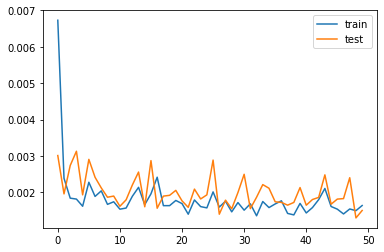

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [ ]:
print('MAE:', metrics.mean_absolute_error(inv_y, inv_yhat))
print('MSE:', metrics.mean_squared_error(inv_y, inv_yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(inv_y, inv_yhat)))

MAE: 0.07817528
MSE: 0.60284686
RMSE: 0.77643216
